# Project: Explore different variables impacting GDP per capita 
### (with Gap Minder dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

The Gap Minder dataset gathers data from different countries, spanning from 1960 to 2018. This project aims to explore the economic factors of different countries throughout time. 

In this project, I will examine different factors that correlate with the Gdp per capita. The basic information of the dataset is described below: 
- the dependent variable is the GDP per Capita
- the independent variables are agriculture/ industry/ service/ export/ import percentage of gdp and debt of the country.

Below are research questions: 
- 1st research question: **What are indicators that correlate with the gdp per capita variable?** Even if we cannot assume a causal relationship, it is important to identify possible correlations that could give us some insights for further causal relationship exploration. 
- 2nd research question: **What are the differences of the variables found above in rich and poor countries?**

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

agri = pd.read_csv('agriculture_percent_of_gdp.csv') #agriculture
indu = pd.read_csv('industry_percent_of_gdp.csv') #industry
serv = pd.read_csv('services_percent_of_gdp.csv') #service
debt = pd.read_csv('debt_to_foreigners_by_public_and_private_percent_of_gni.csv') #debt
exp = pd.read_csv('exports_percent_of_gdp.csv') #export
imp = pd.read_csv('imports_percent_of_gdp.csv') #import
gdpcap = pd.read_csv('gdppercapita_us_inflation_adjusted.csv')

<a id='wrangling'></a>
## Data Wrangling

### General Properties

Each row will have the data format: Country -- Year -- GDP -- agriculture -- industry -- 
However, not all rows have all the data values. Thus, I will have to selectively choose the nations to examine, and choose the years that have a large number of dataset.

In [38]:
gdpcap.head()

,country,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,Afghanistan,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,488.0,543,529.0,576.0,588.0,584.0,574.0,571.0,572.0,564.0
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3930.0,4090,4210.0,4280.0,4330.0,4410.0,4520.0,4680.0,4870.0,5080.0
2,Algeria,2480.0,2090.0,1640.0,2150.0,2210.0,2290.0,2120.0,2260.0,2430.0,...,4400.0,4480,4520.0,4590.0,4620.0,4700.0,4780.0,4830.0,4790.0,4760.0
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,42000.0,39700,38200.0,38200.0,39100.0,40800.0,41800.0,42900.0,43900.0,44600.0
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3550.0,3590,3580.0,3750.0,3800.0,3840.0,3750.0,3530.0,3410.0,3230.0


Starting the project by merging different table together, the new table will have the format below

In [39]:
#Collect the year for groupby function
year = debt.columns.drop(['country'])

#Supporting function
def melt (dataset, name):
    dataset = dataset.melt(value_name = name, id_vars='country', value_vars=year, var_name = 'year')
    return dataset

#Melting down the panda dataframe, using the supporting function above to shorten the code 
agri = melt(agri,'Agri')
indu = melt(indu, 'Indu')
serv = melt(serv, 'Serv')
debt = melt(debt, 'Debt')
exp = melt(exp, 'Exp')
imp = melt(imp, 'Imp')
gdpcap = melt(gdpcap, 'Gdpcap')

#Merge tables together
data = pd.merge (gdpcap, agri, on = ['country','year'], how = 'left')
data = pd.merge (data, indu, on = ['country','year'], how = 'left')
data = pd.merge (data, serv, on = ['country','year'], how = 'left')
data = pd.merge (data, debt, on = ['country','year'], how = 'left')
data = pd.merge (data, exp, on = ['country','year'], how = 'left')
data = pd.merge (data, imp, on = ['country','year'], how = 'left')

In [59]:
data.head()

,country,year,Gdpcap,Agri,Indu,Serv,Debt,Exp,Imp
0,Afghanistan,1970,NaN,NaN,NaN,NaN,NaN,0.0978,0.119
1,Albania,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1970,2710.0,NaN,NaN,NaN,0.198,0.2210,0.292
3,Andorra,1970,42100.0,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1970,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
#Explore the null values of the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9359 entries, 0 to 9358
Data columns (total 9 columns):
country    9359 non-null object
year       9359 non-null object
Gdpcap     7895 non-null float64
Agri       6871 non-null float64
Indu       6816 non-null float64
Serv       6413 non-null float64
Debt       4769 non-null float64
Exp        7218 non-null float64
Imp        7218 non-null float64
dtypes: float64(7), object(2)
memory usage: 731.2+ KB


### Choose years and countries to examine
Looking at the information of the dataset, "DEBT" indicator has the largest number of null values. I originally use the 'debt' as a benchmark to trim the dataset and meet some glitches along the way.

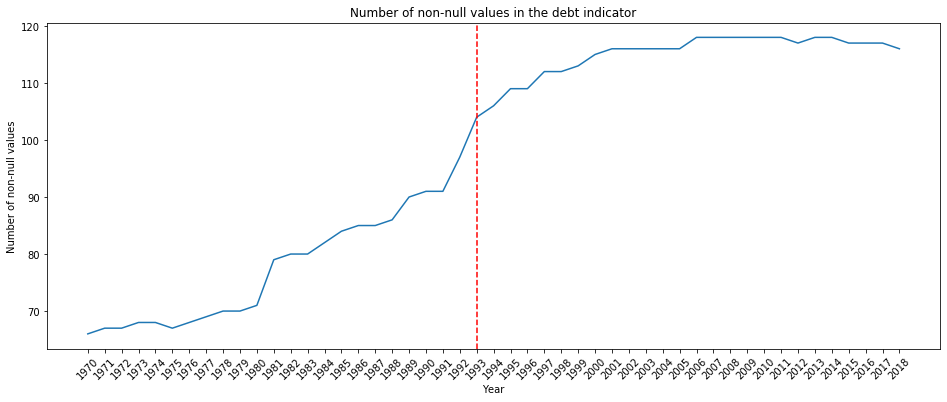

In [65]:
#Look at the YEAR variable
plt.figure (figsize = (16,6))
plt.plot(data.groupby('year')[['Debt']].count())
plt.xticks(rotation=45)
plt.axvline(23, color = 'r', linestyle = '--')
plt.xlabel ('Year')
plt.ylabel ('Number of non-null values')
plt.title ('Number of non-null values in the debt indicator')
plt.show()

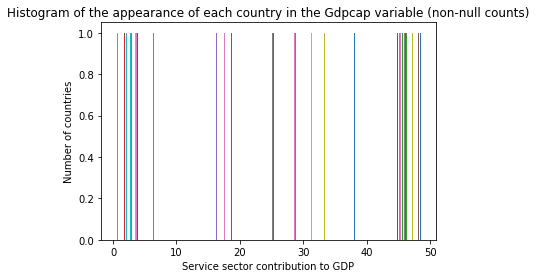

In [69]:
#Look at the COUNTRY variable
country_groupby = data.groupby('country')[['Debt']].count()
plt.hist (country_groupby)
plt.xlabel ('Service sector contribution to GDP')
plt.ylabel ('Number of countries')
plt.title ('Histogram of the appearance of each country in the Gdpcap variable (non-null counts)')
plt.show()

In [73]:
# Create conditions of years and countries
data['year'] = data['year'].astype(int)
year = data['year'] > 1992

country = data.groupby('country', as_index = False)['Debt'].count()
country = country.loc[country['Debt']>30]

#Trim the dataset
country = country['country']
df = data[year & data['country'].isin(country)].reset_index(drop = True)

In [74]:
df.head()

,country,year,Gdpcap,Agri,Indu,Serv,Debt,Exp,Imp
0,Algeria,1993,3280.0,NaN,NaN,NaN,0.545,0.2180,0.2310
1,Argentina,1993,7640.0,0.0514,0.273,0.611,0.277,0.0691,0.0931
2,Bangladesh,1993,439.0,0.2730,0.229,0.460,0.415,0.0902,0.1410
3,Belize,1993,3510.0,0.1460,0.191,0.549,0.359,0.4670,0.5020
4,Benin,1993,625.0,0.3410,0.122,0.537,0.569,0.2250,0.3290


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2262 entries, 0 to 2261
Data columns (total 9 columns):
country    2262 non-null object
year       2262 non-null int32
Gdpcap     2248 non-null float64
Agri       2202 non-null float64
Indu       2184 non-null float64
Serv       2092 non-null float64
Debt       2249 non-null float64
Exp        2142 non-null float64
Imp        2142 non-null float64
dtypes: float64(7), int32(1), object(1)
memory usage: 150.3+ KB


The dataset looks great, there are still some non-values data, but the number of null values is trivial. We will try to understand the dataset.

In [76]:
df.describe()

,year,Gdpcap,Agri,Indu,Serv,Debt,Exp,Imp
count,2262.000000,2248.000000,2202.000000,2184.000000,2092.000000,2249.000000,2142.000000,2142.000000
mean,2005.500000,2934.892349,0.190108,0.253939,0.486231,0.615745,0.305565,0.398786
std,7.501658,2859.963931,0.129042,0.108658,0.106524,0.661520,0.164151,0.197810
min,1993.000000,179.000000,0.018300,0.020700,0.124000,0.012400,0.042300,0.072400
25%,1999.000000,759.750000,0.085125,0.174000,0.415000,0.278000,0.190000,0.263000
50%,2005.500000,1805.000000,0.157500,0.245000,0.491000,0.441000,0.269500,0.359000
75%,2012.000000,4190.000000,0.267750,0.307250,0.553000,0.730000,0.393000,0.510750
max,2018.000000,15100.000000,0.790000,0.774000,0.779000,9.160000,1.140000,2.360000


We have a problem here. The max GDP per capita is 15,100, which, I would say, do not include the data from developed countries. Thus, by trimming the datatset using the independent variables, I omit many countries that do not record 'debt' as a part of their index. Thus, I will redo my trimming again. This time, I only trim the countries that have few values in the dependent variables. 

<a id='eda'></a>
## 2nd attempt in cleaning the dataset

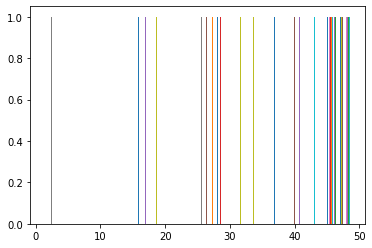

In [77]:
#Look at the country variable
country_groupby = data.groupby('country')[['Gdpcap']].count()
plt.hist (country_groupby)
plt.xtick ('Service sector contribution to GDP')
plt.ytick ('Number of countries')
plt.title ('Histogram of the appearance of each country in the Gdpcap variable (non-null counts)')
plt.show()

In [78]:
# Create conditions of years and countries
data['year'] = data['year'].astype(int)
year = data['year'] > 1992

#We only take into account the countries that have at least 40 values
country = data.groupby('country', as_index = False)['Gdpcap'].count()
country = country.loc[country['Gdpcap']>40]

#Trim the dataset
country = country['country']
df = data[year & data['country'].isin(country)].reset_index(drop = True)

In [79]:
#Understand the skewness of the null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3198 entries, 0 to 3197
Data columns (total 9 columns):
country    3198 non-null object
year       3198 non-null int32
Gdpcap     3193 non-null float64
Agri       3077 non-null float64
Indu       3082 non-null float64
Serv       3043 non-null float64
Debt       1935 non-null float64
Exp        3014 non-null float64
Imp        3014 non-null float64
dtypes: float64(7), int32(1), object(1)
memory usage: 212.5+ KB


In [80]:
#Understand the dataset => This time, the dependent variables become more reasonable. 
df.describe()

,year,Gdpcap,Agri,Indu,Serv,Debt,Exp,Imp
count,3198.000000,3193.000000,3077.000000,3082.000000,3043.000000,1935.000000,3014.000000,3014.000000
mean,2005.500000,15497.507673,0.123336,0.270161,0.536041,0.580282,0.381534,0.419832
std,7.501173,23029.346724,0.124340,0.118008,0.123627,0.564386,0.282601,0.254359
min,1993.000000,207.000000,0.000249,0.020700,0.106000,0.012400,0.000054,0.000156
25%,1999.000000,1470.000000,0.025700,0.193000,0.455000,0.265500,0.213000,0.267000
50%,2005.500000,5080.000000,0.078300,0.252000,0.537000,0.423000,0.313000,0.356000
75%,2012.000000,21900.000000,0.182000,0.315000,0.627000,0.707500,0.459000,0.509000
max,2018.000000,196000.000000,0.614000,0.848000,0.874000,8.800000,2.290000,2.080000


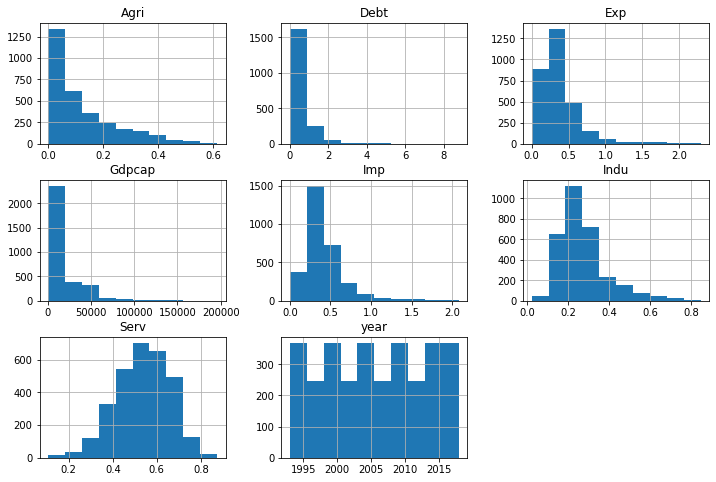

In [82]:
#Of all the years
df.hist(figsize = (12,8))
plt.show()

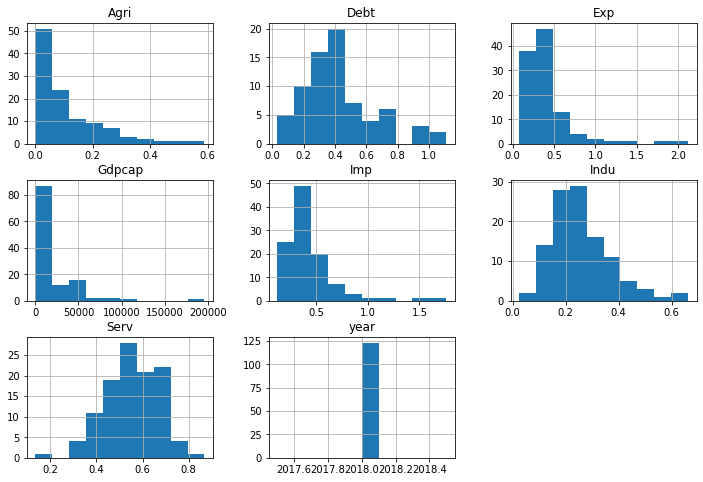

In [83]:
#The most recent year 2018
df[df.year == 2018].hist(figsize = (12,8))
plt.show()

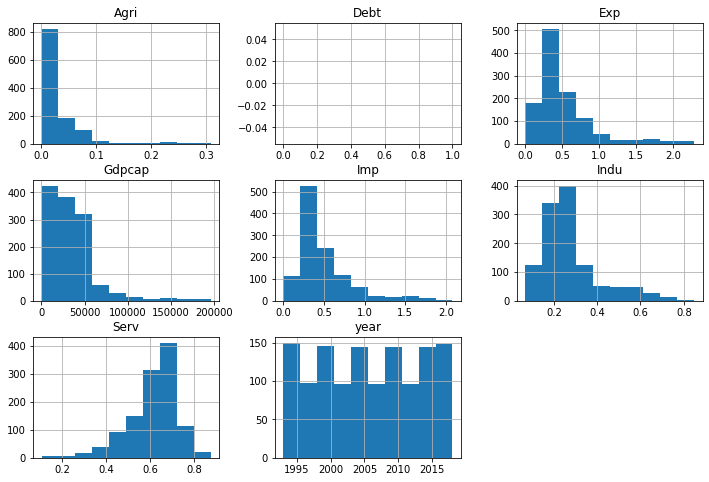

In [84]:
df[df.Debt.isnull()].hist(figsize = (12,8))
plt.show()

Some initial thoughts from the histogram:
- With the first histogram, the majority of countries have the service sector contributes the most to the GDP. The industry sector plays the second role, followed by the agriculture industry. The agriculture industry has the gamma distribution, which indicates that quite a lot of countries shift away the GDP proportion from agriculture to other sectors. A minority of the countries still have agriculture playing a significant role. 
- The second histogram depicts the most recent breakdown of the contribution of different sectors towards GDP. There is no significant difference between the first and second paragraph. For that reason, I may conclude that overall, the world does not witness a significant transition from agriculture to other sectors from 1993 to 2018

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 (What are the correlation between different variables)

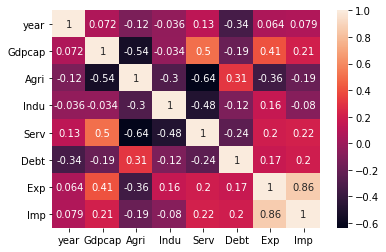

In [85]:
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.title ('Correlation matrix')
plt.show()

Analysis: 
- There is a is a high correlation between the GDP per capita and the proportion of service sector that contributes to the GDP per capita. The contribution of the service sector towards the overall GDP can explain 25% of the GDP per capita. The contribution of the agricultural sector has a negative correlation with the GDP per capita of a country. 
- The GDP per capita has a stronger positive correlation with the export compared to import. 

### Research Question 2 (How do export and service sector evolve in the richest and poorest countries over time)

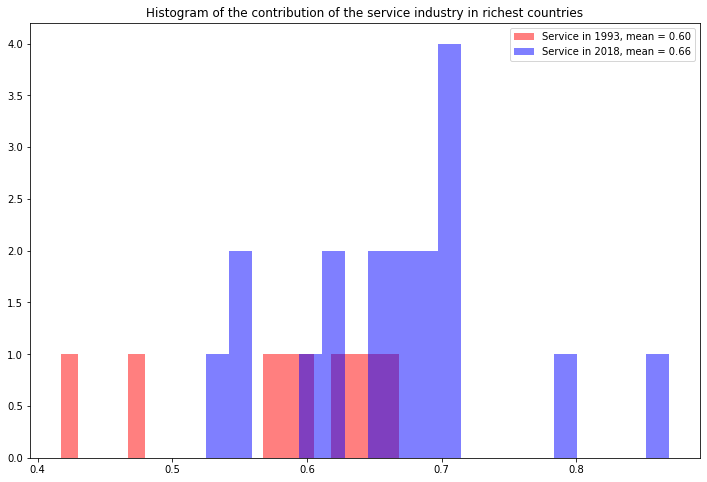

Median of GDP per capita in 1993 is $34900.00
Median of GDP per capita in 2018 is $51750.00


In [125]:
#Analyze 1992 dataset
df_1993 = df[df['year']==1993].copy()

#Top 10 benchmark
top_20_1993 = np.nanpercentile(df_1993.Gdpcap, 80)
df_1993_top_20 = df_1993[df_1993['Gdpcap']>top_20_1993]
mean_1993_Serv = np.mean(df_1993_top_20.Serv)

#Analyze 2018 dataset
df_2018 = df[df['year']==2018].copy()

#Top 10 benchmark
top_20_2018 = np.nanpercentile(df_2018.Gdpcap, 80)
df_2018_top_20 = df_2018[df_2018['Gdpcap']>top_20_2018]
mean_2018_Serv = np.mean(df_2018_top_20.Serv)

#Plot the histogram
plt.figure (figsize = (12,8))
plt.hist (df_1993_top_10.Serv, color = 'r', alpha = 0.5, label = 'Service in 1993, mean = {:0.2f}'.format (mean_1993_Serv), bins = 20)
plt.hist (df_2018_top_10.Serv, color = 'b', alpha = 0.5, label = 'Service in 2018, mean = {:0.2f}'.format (mean_2018_Serv), bins = 20)
plt.title ('Histogram of the contribution of the service industry in richest countries')
plt.xtick ('Service sector contribution to GDP')
plt.ytick ('Number of countries')
plt.legend()
plt.show()

print ('Median of GDP per capita in 1993 is ${:0.2f}'.format (np.median(df_1993_top_20.Gdpcap)))
print ('Median of GDP per capita in 2018 is ${:0.2f}'.format (np.median(df_2018_top_20.Gdpcap)))

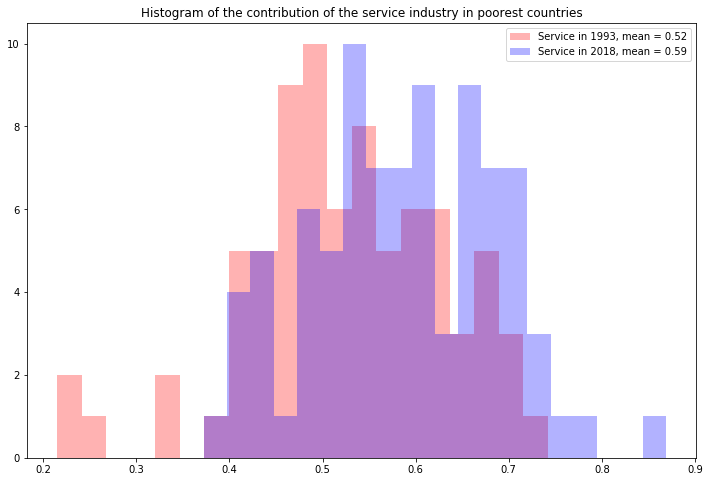

Median of GDP per capita in 1993 is $5995.00
Median of GDP per capita in 2018 is $10200.00


In [135]:
#Analyze 1992 dataset
df_1993 = df[df['year']==1993].copy()

#Top 10 benchmark
bottom_20_1993 = np.nanpercentile(df_1993.Gdpcap, 20)
df_1993_bottom_20 = df_1993[df_1993['Gdpcap']>bottom_20_1993]
mean_1993_Serv = np.mean(df_1993_bottom_20.Serv)

#Analyze 2018 dataset
df_2018 = df[df['year']==2018].copy()

#Top 10 benchmark
bottom_20_2018 = np.nanpercentile(df_2018.Gdpcap, 20)
df_2018_bottom_20 = df_2018[df_2018['Gdpcap']>bottom_20_2018]
mean_2018_Serv = np.mean(df_2018_bottom_20.Serv)

#Plot the histogram
plt.figure (figsize = (12,8))
plt.hist (df_1993_bottom_20.Serv, color = 'r', alpha = 0.3, label = 'Service in 1993, mean = {:0.2f}'.format (mean_1993_Serv), bins = 20)
plt.hist (df_2018_bottom_20.Serv, color = 'b', alpha = 0.3, label = 'Service in 2018, mean = {:0.2f}'.format (mean_2018_Serv), bins = 20)
plt.title ('Histogram of the contribution of the service industry in poorest countries')
plt.xtick ('Service sector contribution to GDP')
plt.ytick ('Number of countries')
plt.legend()
plt.show()

print ('Median of GDP per capita in 1993 is ${:0.2f}'.format (np.median(df_1993_bottom_20.Gdpcap)))
print ('Median of GDP per capita in 2018 is ${:0.2f}'.format (np.median(df_2018_bottom_20.Gdpcap)))

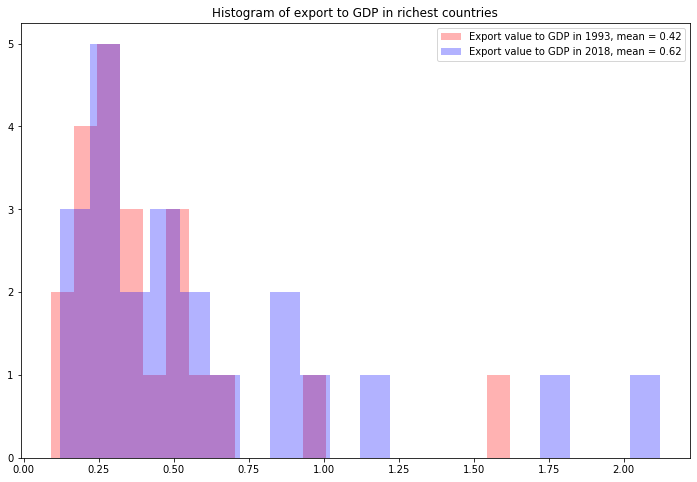

In [131]:
mean_1993_Exp = np.mean(df_1993_top_20.Exp)
mean_2018_Exp = np.mean(df_2018_top_20.Exp)

#Plot the histogram of the export contribution to GDP
plt.figure (figsize = (12,8))
plt.hist (df_1993_top_20.Exp, color = 'r', alpha = 0.3, label = 'Export value to GDP in 1993, mean = {:0.2f}'.format (mean_1993_Exp), bins = 20)
plt.hist (df_2018_top_20.Exp, color = 'b', alpha = 0.3, label = 'Export value to GDP in 2018, mean = {:0.2f}'.format (mean_2018_Exp), bins = 20)
plt.title ('Histogram of export to GDP in richest countries')
plt.xtick ('Export value to GDP')
plt.ytick ('Number of countries')
plt.legend()
plt.show()

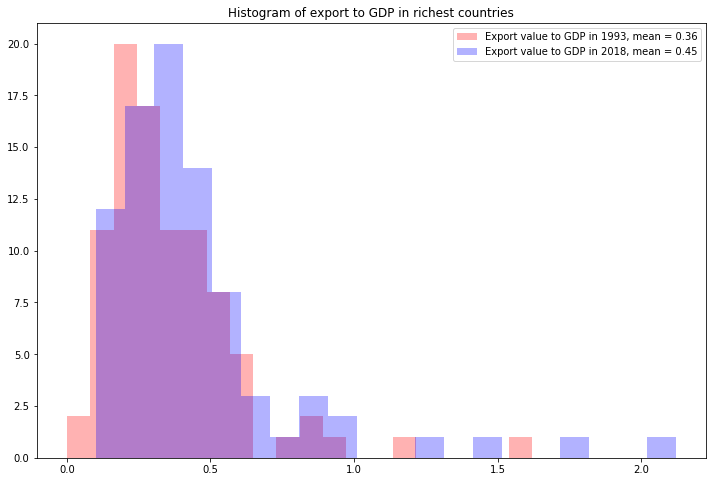

In [136]:
mean_1993_Exp = np.mean(df_1993_bottom_20.Exp)
mean_2018_Exp = np.mean(df_2018_bottom_20.Exp)

#Plot the histogram of the export contribution to GDP
plt.figure (figsize = (12,8))
plt.hist (df_1993_bottom_20.Exp, color = 'r', alpha = 0.3, label = 'Export value to GDP in 1993, mean = {:0.2f}'.format (mean_1993_Exp), bins = 20)
plt.hist (df_2018_bottom_20.Exp, color = 'b', alpha = 0.3, label = 'Export value to GDP in 2018, mean = {:0.2f}'.format (mean_2018_Exp), bins = 20)
plt.title ('Histogram of export to GDP in richest countries')
plt.xtick ('Export value to GDP')
plt.ytick ('Number of countries')
plt.legend()
plt.show()

<a id='conclusions'></a>
## Conclusions

> **Conclusion**: 
1. **A general trend towards the service sector in both the richest and poorest countries.** In terms of the GDP breakdown, there is a trend in shifting away from the agriculture/ industry sector to focus more on the service sector. This trend can be observed in both the richest countries and the poorest countries. 
2. **The richest countries has the export values increasing at a much faster rate compared to the export values in the poorest countries.** Over time, the export values (compared to GDP) will increase in both the richest and poorest countries. The richest countries have a higher increase in the export values compared to the poorest countries. In the top 20% countries, the export value jumped from 42% in 1993 to 62% in 2018. On the other hand, the bottom 20% countries only witness an increase from 36% to 45%. 

> **Limitation**:
1. The richest and poorest countries in 1993 are not necessarily the richest and poorest countries in 2018. Thus, I am not comparing countries together, but the overall trend of the worldwide economy. This also creates some disadvantages for further causal inference in the future.
2. There are null values in the examined dataset. I decided not to delete these rows because I might delete important information. However, this process also makes my analysis a bit vulnerable to null values. There are about 200 null values in each 'Exp' and 'Serv' variable, which might skew the richest and poorest dataset.

